<a href="https://colab.research.google.com/github/ruanwensheng/Machine-Learning-Algorithms-/blob/ensemble_rf/GradientBoost_XGBoost_on_Loan_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas numpy scikit-learn

In [3]:

import numpy as np

import pandas as pd

df = pd.read_csv('/content/loan_data.csv')
# df.head()

# preprocess
# inplace = true để cập nhật df luôn
df.dropna(inplace = True)

df.drop(columns = ['Loan_ID'], inplace = True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

notNum = df.dtypes == object

col_notNum = df.columns[notNum].tolist()
print(col_notNum)


df[col_notNum]= df[col_notNum].apply(lambda col: le.fit_transform(col))

df.head()

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [20]:
# chia dữ liệu train, test

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state = 36)

x_train = train.drop(columns = ['Loan_Status'])
y_train = train['Loan_Status']


x_test = test.drop(columns = ['Loan_Status'])
y_test = test['Loan_Status']

from math import log
from sklearn.ensemble import GradientBoostingClassifier

model =  GradientBoostingClassifier(
    learning_rate = 0.01,
    n_estimators= 400,
    max_depth = 3,
    random_state = 36
)

model.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=400,
                           random_state=36)

model được khởi tạo với n_estimators = 200, model.staged_predict_proba(x_test) sẽ cho ra kết quả dự đoán sau 1,2,3,.., n_estimators trees. Duyệt như này để tìm số lượng cây cho ra mean_square_error giữa y thật và y đoán là nhỏ nhất
- Đầu vào của hàm log_loss có y_proba là kết quả dự đoán dưới dạng xác suất
- Sử dụng hàm log_loss cho phân lớp nhị phân
- Đối với phân đa lớp thì có thể dùng cross-entropy hoặc log-loss

In [21]:
from sklearn.metrics import log_loss
import numpy as np

errors = [log_loss(y_test, y_proba) for y_proba in model.staged_predict_proba(x_test)]

print(min(errors))
bst_n_estimators = np.argmin(errors)
print(bst_n_estimators)

0.5026360534042283
247


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

gbrt_best = GradientBoostingClassifier(
    learning_rate = 0.01,
    n_estimators= 247,
    max_depth = 3,
    random_state = 36
)
gbrt_best.fit(x_train, y_train)


y_pred = gbrt_best.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print(acc)

0.7916666666666666


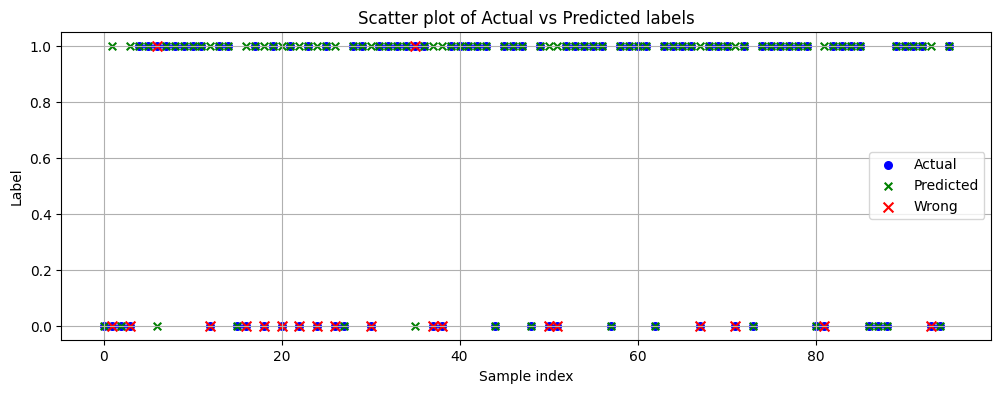

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 4))
x_axis = np.arange(len(y_test))

plt.scatter(x_axis, y_test, label='Actual', marker='o', color='blue', s=30)
plt.scatter(x_axis, y_pred, label='Predicted', marker='x', color='green', s=30)

# đánh dấu các điểm sai bằng chấm đỏ
wrong_idx = y_test != y_pred
plt.scatter(x_axis[wrong_idx], y_test[wrong_idx], color='red', label='Wrong', marker='x', s=50)

plt.legend()
plt.title("Scatter plot of Actual vs Predicted labels")
plt.xlabel("Sample index")
plt.ylabel("Label")
plt.grid(True)
plt.show()


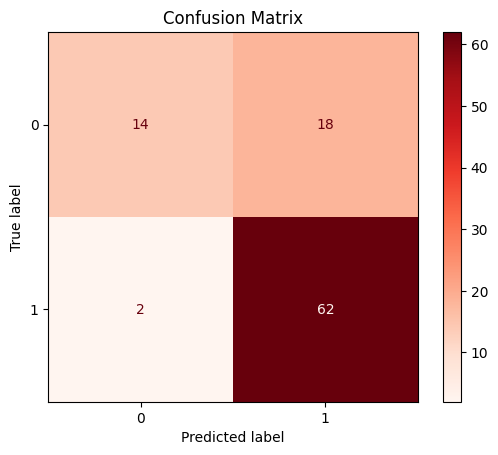

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.show()

TP (True Positive): Dự đoán đúng lớp 1: 62

TN (True Negative): Dự đoán đúng lớp 0: 14

FP (False Positive): Dự đoán nhầm lớp 1 cho mẫu lớp 0: 18

FN (False Negative): Dự đoán nhầm lớp 0 cho mẫu lớp 1: 2

=> Mô hình đang dự đoán quá nhiều mẫu lớp 1

**XGBOOST**

In [26]:
pip install xgboost

In [34]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(
    base_score=0.5,
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=1,
    gamma=0,
    learning_rate=0.1,
    max_delta_step=0,
    max_depth=3,
    min_child_weight=1,
    n_estimators=100,
    objective='binary:logistic',
    random_state=36,
    scale_pos_weight=1,
    subsample=1,
    verbosity=1
)
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=3, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [35]:
print(model_xgb.score(x_test, y_test))

0.78125
